In [490]:
# sims = ["Simulation1_WavelengthSweep", "Simulation2_AM15GSpectrum", "Simulation3_NormalPerturbance", "Simulation4_WavyNormalPerturbance"]

In [ ]:
import json
import pandas as pd
from pathlib import Path
from tqdm import tqdm

results = {}

curr_sim = "Simulation1_WavelengthSweep"
path = Path(rf'Simulations/{curr_sim}/FilePaths.json')
dfs = []

with path.open('rt', encoding='utf-8') as f:
    paths = json.load(f)

for angle in tqdm(paths.keys()):
    for layers in paths[angle].keys():
        for avg in paths[angle][layers].keys():
            for curr_path in paths[angle][layers][avg]:
                wavelength = int(curr_path[-16:-12])
                curr_path = Path(curr_path.replace(avg.upper(), f"{avg}/") + ".json")
                
                with curr_path.open('rt', encoding='utf-8') as f:
                    data = json.load(f)['Stats']
                    start = float(data["StartPower"])
                    useful_stuff = pd.DataFrame({
                        "sim": curr_sim,
                        "angle": int("".join(re.findall(r"\d+", angle))),
                        "layer": int("".join(re.findall(r"\d+", layers))),
                        "avg": int("".join(re.findall(r"\d+", avg))),
                        "wavelength": wavelength,
                        "transmittance": float(data["CapturedPower"]) / start,
                        "absorbance":    float(data["DestroyedPower"]) / start,
                        "reflectance":   float(data["LostPower"]) / start,
                    }, index=[0])
                    dfs.append(useful_stuff)
    
results[curr_sim] = pd.concat(dfs, ignore_index=True)

curr_sim = "Simulation2_AM15GSpectrum"
path = Path(rf'Simulations/{curr_sim}/FilePaths.json')
dfs = []

with path.open('rt', encoding='utf-8') as f:
    paths = json.load(f)

for angle in tqdm(paths.keys()):
    for layers in paths[angle].keys():
        for curr_path in paths[angle][layers]:
            curr_path = Path(curr_path.replace(layers, f"{layers}/") + ".json")

            with curr_path.open('rt', encoding='utf-8') as f:
                data = json.load(f)['Stats']
                start = float(data["StartPower"])
                useful_stuff = pd.DataFrame({
                    "sim": curr_sim,
                    "angle": int("".join(re.findall(r"\d+", angle))),
                    "layer": int("".join(re.findall(r"\d+", layers))),
                    "transmittance": float(data["CapturedPower"]) / start,
                    "absorbance":    float(data["DestroyedPower"]) / start,
                    "reflectance":   float(data["LostPower"]) / start,
                }, index=[0])
                dfs.append(useful_stuff)

results[curr_sim] = pd.concat(dfs, ignore_index=True)

curr_sim = "Simulation3_NormalPerturbance"
path = Path(rf'Simulations/{curr_sim}/FilePaths.json')
dfs = []

with path.open('rt', encoding='utf-8') as f:
    paths = json.load(f)

for angle in tqdm(paths.keys()):
    for peturbance in paths[angle].keys():
        for layers in paths[angle][peturbance].keys():
            for curr_path in paths[angle][peturbance][layers]:
                curr_path = Path(curr_path.replace(layers, f"{layers}/") + ".json")
    
                with curr_path.open('rt', encoding='utf-8') as f:
                    data = json.load(f)['Stats']
                    start = float(data["StartPower"])
                    useful_stuff = pd.DataFrame({
                        "sim": curr_sim,
                        "angle": int("".join(re.findall(r"\d+", angle))),
                        "layer": int("".join(re.findall(r"\d+", layers))),
                        "peturbance": int("".join(re.findall(r"\d+", peturbance))),
                        "transmittance": float(data["CapturedPower"]) / start,
                        "absorbance":    float(data["DestroyedPower"]) / start,
                        "reflectance":   float(data["LostPower"]) / start,
                    }, index=[0])
                    dfs.append(useful_stuff)

results[curr_sim] = pd.concat(dfs, ignore_index=True)

curr_sim = "Simulation4_WavyNormalPerturbance"
path = Path(rf'Simulations/{curr_sim}/FilePaths.json')
dfs = []

with path.open('rt', encoding='utf-8') as f:
    paths = json.load(f)

for angle in tqdm(paths.keys()):
    for peturbance in paths[angle].keys():
        for layers in paths[angle][peturbance].keys():
            for curr_path in paths[angle][peturbance][layers]:
                curr_path = Path(curr_path.replace(layers, f"{layers}/") + ".json")
    
                with curr_path.open('rt', encoding='utf-8') as f:
                    data = json.load(f)['Stats']
                    start = float(data["StartPower"])
                    useful_stuff = pd.DataFrame({
                        "sim": curr_sim,
                        "angle": int("".join(re.findall(r"\d+", angle))),
                        "layer": int("".join(re.findall(r"\d+", layers))),
                        "peturbance": int("".join(re.findall(r"\d+", peturbance))),
                        "transmittance": float(data["CapturedPower"]) / start,
                        "absorbance":    float(data["DestroyedPower"]) / start,
                        "reflectance":   float(data["LostPower"]) / start,
                    }, index=[0])
                    dfs.append(useful_stuff)

results[curr_sim] = pd.concat(dfs, ignore_index=True)

In [ ]:
sim1_df = results["Simulation1_WavelengthSweep"]
sim2_df = results["Simulation2_AM15GSpectrum"]
sim3_df = results["Simulation3_NormalPerturbance"]
sim4_df = results["Simulation4_WavyNormalPerturbance"]

In [117]:
sim1_df

,sim,angle,layer,avg,wavelength,transmittance,absorbance,reflectance
0,Simulation1_WavelengthSweep,0,10,0,280,0.990366,0.001756,0.007877
1,Simulation1_WavelengthSweep,0,10,0,282,0.990416,0.001748,0.007836
2,Simulation1_WavelengthSweep,0,10,0,285,0.990464,0.001740,0.007797
3,Simulation1_WavelengthSweep,0,10,0,287,0.990510,0.001732,0.007758
4,Simulation1_WavelengthSweep,0,10,0,290,0.990554,0.001725,0.007721
...,...,...,...,...,...,...,...,...
160395,Simulation1_WavelengthSweep,60,95,4,3895,0.993765,0.006235,0.000000
160396,Simulation1_WavelengthSweep,60,95,4,3920,0.993765,0.006235,0.000000
160397,Simulation1_WavelengthSweep,60,95,4,3945,0.993765,0.006235,0.000000
160398,Simulation1_WavelengthSweep,60,95,4,3970,0.993765,0.006235,0.000000


In [242]:
sim1_df

,sim,angle,layer,avg,wavelength,transmittance,absorbance,reflectance
0,Simulation1_WavelengthSweep,0,10,0,280,0.990366,0.001756,0.007877
1,Simulation1_WavelengthSweep,0,10,0,282,0.990416,0.001748,0.007836
2,Simulation1_WavelengthSweep,0,10,0,285,0.990464,0.001740,0.007797
3,Simulation1_WavelengthSweep,0,10,0,287,0.990510,0.001732,0.007758
4,Simulation1_WavelengthSweep,0,10,0,290,0.990554,0.001725,0.007721
...,...,...,...,...,...,...,...,...
160395,Simulation1_WavelengthSweep,60,95,4,3895,0.993765,0.006235,0.000000
160396,Simulation1_WavelengthSweep,60,95,4,3920,0.993765,0.006235,0.000000
160397,Simulation1_WavelengthSweep,60,95,4,3945,0.993765,0.006235,0.000000
160398,Simulation1_WavelengthSweep,60,95,4,3970,0.993765,0.006235,0.000000


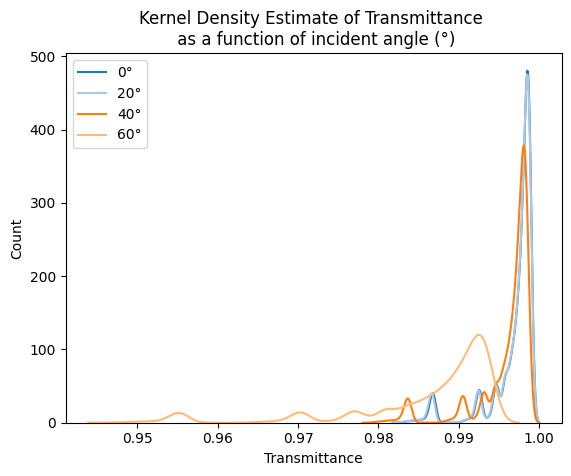

In [273]:
sns.set_palette("tab20")
sns.kdeplot(sim1_df.loc[sim1_df['angle']==0]['transmittance'], label="0°")
sns.kdeplot(sim1_df.loc[sim1_df['angle']==20]['transmittance'], label="20°")
sns.kdeplot(sim1_df.loc[sim1_df['angle']==40]['transmittance'], label="40°")
sns.kdeplot(sim1_df.loc[sim1_df['angle']==60]['transmittance'], label="60°")
# sns.kdeplot(sim1_df['absorbance'])
# sns.kdeplot(sim1_df['reflectance'])
plt.legend()
plt.title("Kernel Density Estimate of Transmittance \n as a function of incident angle (°)")
plt.xlabel("Transmittance")
plt.ylabel("Count")
plt.savefig("kde_trans")
plt.show()

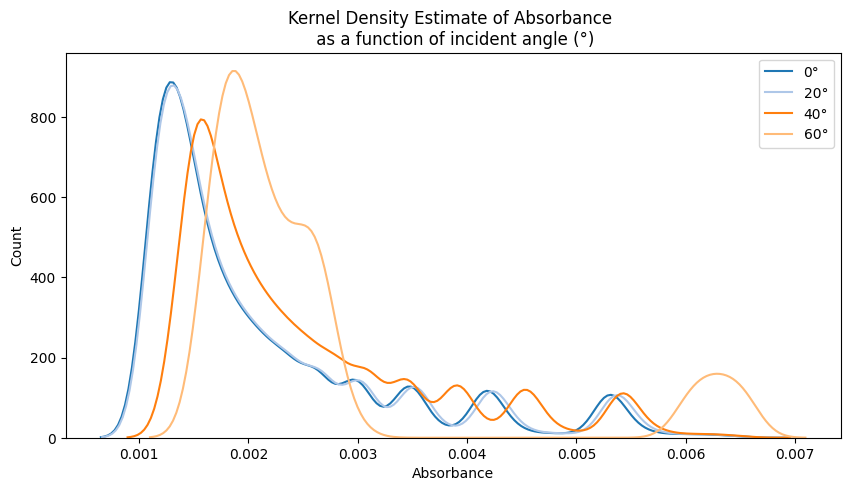

In [274]:
sns.set_palette("tab20")
plt.figure(figsize=(10, 5))
sns.kdeplot(sim1_df.loc[sim1_df['angle']==0]['absorbance'], label="0°")
sns.kdeplot(sim1_df.loc[sim1_df['angle']==20]['absorbance'], label="20°")
sns.kdeplot(sim1_df.loc[sim1_df['angle']==40]['absorbance'], label="40°")
sns.kdeplot(sim1_df.loc[sim1_df['angle']==60]['absorbance'], label="60°")
# sns.kdeplot(sim1_df['absorbance'])
# sns.kdeplot(sim1_df['reflectance'])
plt.legend()
plt.title("Kernel Density Estimate of Absorbance \n as a function of incident angle (°)")
plt.xlabel("Absorbance")
plt.ylabel("Count")
plt.savefig("kde_absorb")
plt.show()

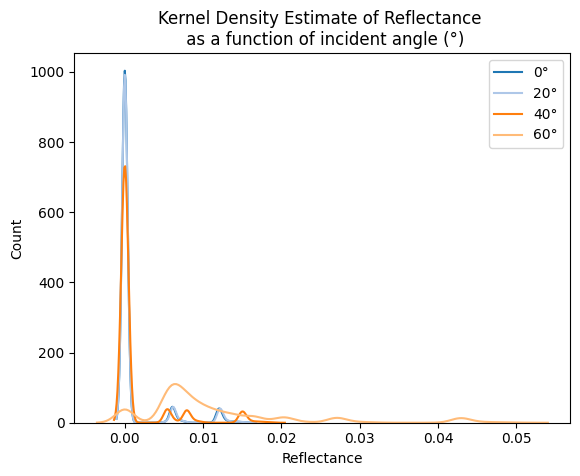

In [275]:
sns.set_palette("tab20")
sns.kdeplot(sim1_df.loc[sim1_df['angle']==0]['reflectance'], label="0°")
sns.kdeplot(sim1_df.loc[sim1_df['angle']==20]['reflectance'], label="20°")
sns.kdeplot(sim1_df.loc[sim1_df['angle']==40]['reflectance'], label="40°")
sns.kdeplot(sim1_df.loc[sim1_df['angle']==60]['reflectance'], label="60°")
# sns.kdeplot(sim1_df['absorbance'])
# sns.kdeplot(sim1_df['reflectance'])
plt.legend()
plt.title("Kernel Density Estimate of Reflectance \n as a function of incident angle (°)")
plt.xlabel("Reflectance")
plt.ylabel("Count")
plt.savefig("kde_reflect")
plt.show()

In [100]:
sim2_df

,sim,angle,layer,transmittance,absorbance,reflectance
0,Simulation2_AM15GSpectrum,0,10,0.992412,0.001410,0.006178
1,Simulation2_AM15GSpectrum,0,10,0.992408,0.001411,0.006181
2,Simulation2_AM15GSpectrum,0,10,0.992411,0.001410,0.006179
3,Simulation2_AM15GSpectrum,0,10,0.992417,0.001409,0.006174
4,Simulation2_AM15GSpectrum,0,10,0.992413,0.001410,0.006177
...,...,...,...,...,...,...
395,Simulation2_AM15GSpectrum,60,95,0.993599,0.005809,0.000592
396,Simulation2_AM15GSpectrum,60,95,0.993602,0.005827,0.000571
397,Simulation2_AM15GSpectrum,60,95,0.993601,0.005816,0.000582
398,Simulation2_AM15GSpectrum,60,95,0.993599,0.005799,0.000602


In [101]:
import seaborn as sns

In [113]:
curr_sim = "Simulation1_WavelengthSweep"
path = Path(rf'Simulations/{curr_sim}/FilePaths.json')
dfs = []

with path.open('rt', encoding='utf-8') as f:
    paths = json.load(f)

for angle in tqdm(paths.keys()):
    for layers in paths[angle].keys():
        for avg in paths[angle][layers].keys():
            for curr_path in paths[angle][layers][avg]:
                wavelength = curr_path[-11:-7]
                curr_path = Path(curr_path.replace(avg.upper(), f"{avg}/") + ".json")
                
                with curr_path.open('rt', encoding='utf-8') as f:
                    data = json.load(f)['Stats']
                    start = float(data["StartPower"])
                    useful_stuff = pd.DataFrame({
                        "sim": curr_sim,
                        "angle": int("".join(re.findall(r"\d+", angle))),
                        "layer": int("".join(re.findall(r"\d+", layers))),
                        "avg": int("".join(re.findall(r"\d+", avg))),
                        "wavelength": int("".join(re.findall(r"\d+", wavelength))),
                        "transmittance": float(data["CapturedPower"]) / start,
                        "absorbance":    float(data["DestroyedPower"]) / start,
                        "reflectance":   float(data["LostPower"]) / start,
                    }, index=[0])
                    dfs.append(useful_stuff)
    
results[curr_sim] = pd.concat(dfs, ignore_index=True)

100%|█████████████████████████████████████████████| 4/4 [00:53<00:00, 13.39s/it]


In [234]:
sim1_df

,sim,angle,layer,avg,wavelength,transmittance,absorbance,reflectance
0,Simulation1_WavelengthSweep,0,10,0,280,0.990366,0.001756,0.007877
1,Simulation1_WavelengthSweep,0,10,0,282,0.990416,0.001748,0.007836
2,Simulation1_WavelengthSweep,0,10,0,285,0.990464,0.001740,0.007797
3,Simulation1_WavelengthSweep,0,10,0,287,0.990510,0.001732,0.007758
4,Simulation1_WavelengthSweep,0,10,0,290,0.990554,0.001725,0.007721
...,...,...,...,...,...,...,...,...
160395,Simulation1_WavelengthSweep,60,95,4,3895,0.993765,0.006235,0.000000
160396,Simulation1_WavelengthSweep,60,95,4,3920,0.993765,0.006235,0.000000
160397,Simulation1_WavelengthSweep,60,95,4,3945,0.993765,0.006235,0.000000
160398,Simulation1_WavelengthSweep,60,95,4,3970,0.993765,0.006235,0.000000


In [157]:
layer_means = (
    sim1_df
    .groupby(["angle", "layer"], as_index=False)
    .agg(
        transmittance=("transmittance", "mean"),
        absorbance=("absorbance", "mean"),
        reflectance=("reflectance", "mean"),
    )
)

In [159]:
layer_means = layer_means.loc[layer_means['layer']==5]

In [171]:
layer_means["transmittance"] = layer_means["transmittance"]*100
layer_means["absorbance"] = layer_means["absorbance"]*100
layer_means["reflectance"] = layer_means["reflectance"]*100

/var/folders/6w/52bs8_y541g1q8xj2tk6lkqw0000gn/T/ipykernel_28207/2230950214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layer_means["transmittance"] = layer_means["transmittance"]*100
/var/folders/6w/52bs8_y541g1q8xj2tk6lkqw0000gn/T/ipykernel_28207/2230950214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layer_means["absorbance"] = layer_means["absorbance"]*100
/var/folders/6w/52bs8_y541g1q8xj2tk6lkqw0000gn/T/ipykernel_28207/2230950214.py:3: SettingWithCopyWarning: 
A value is trying to be set

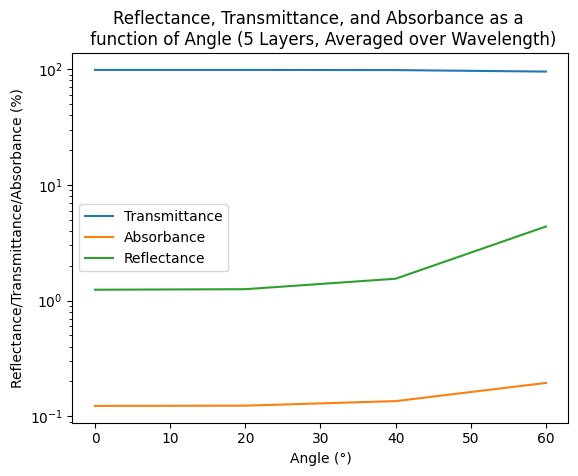

In [186]:
sns.lineplot(data=layer_means, x='angle', y='transmittance', label="Transmittance")
sns.lineplot(data=layer_means, x='angle', y='absorbance', label="Absorbance")
sns.lineplot(data=layer_means, x='angle', y='reflectance', label="Reflectance")
plt.ylabel("Reflectance/Transmittance/Absorbance (%)")
plt.yscale("log")
plt.xlabel("Angle (°)")
plt.title("Reflectance, Transmittance, and Absorbance as a \n function of Angle (5 Layers, Averaged over Wavelength)")
plt.savefig("sim1_1")
plt.show()

In [123]:
import matplotlib.pyplot as plt

In [141]:
sim_df_layer5 = sim1_df.loc[sim1_df['layer']==5]

In [137]:
sim_df_0 = sim1_df.loc[sim1_df['angle']==0]
sim_df_60 = sim1_df.loc[sim1_df['angle']==60]

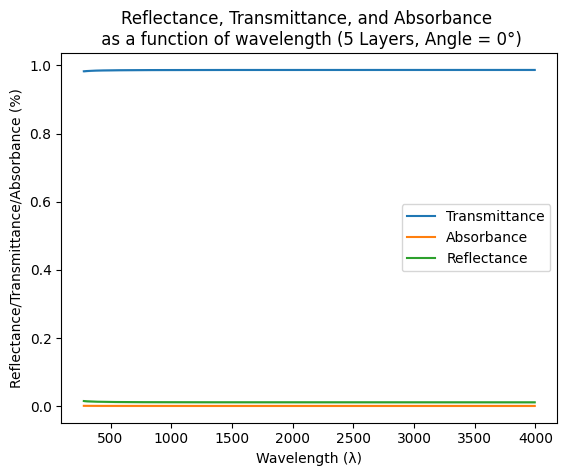

In [185]:
sns.lineplot(data=sim_df_0.loc[sim_df_0['layer']==5], x='wavelength', y='transmittance', label="Transmittance")
sns.lineplot(data=sim_df_0.loc[sim_df_0['layer']==5], x='wavelength', y='absorbance', label="Absorbance")
sns.lineplot(data=sim_df_0.loc[sim_df_0['layer']==5], x='wavelength', y='reflectance', label="Reflectance")
plt.ylabel("Reflectance/Transmittance/Absorbance (%)")
plt.xlabel("Wavelength (λ)")
plt.title("Reflectance, Transmittance, and Absorbance \n as a function of wavelength (5 Layers, Angle = 0°)")
plt.savefig("sim1_2")
plt.show()

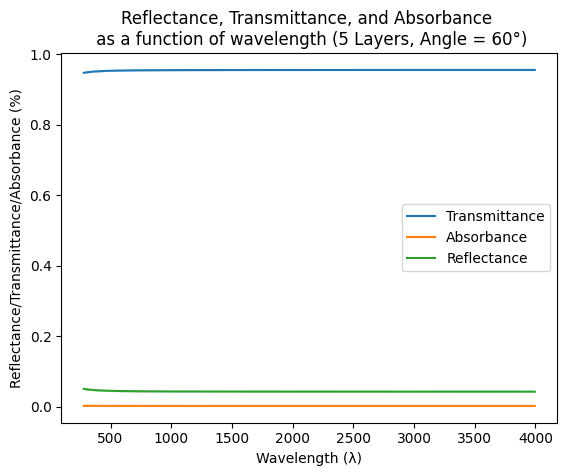

In [184]:
sns.lineplot(data=sim_df_60.loc[sim_df_60['layer']==5], x='wavelength', y='transmittance', label="Transmittance")
sns.lineplot(data=sim_df_60.loc[sim_df_60['layer']==5], x='wavelength', y='absorbance', label="Absorbance")
sns.lineplot(data=sim_df_60.loc[sim_df_60['layer']==5], x='wavelength', y='reflectance', label="Reflectance")
plt.ylabel("Reflectance/Transmittance/Absorbance (%)")
plt.xlabel("Wavelength (λ)")
plt.title("Reflectance, Transmittance, and Absorbance \n as a function of wavelength (5 Layers, Angle = 60°)")
plt.savefig("sim1_3")
plt.show()

In [175]:
sns.set_palette('tab10')

### sim 2

In [473]:
sim2_df.groupby(by=["layer", "angle"])['transmittance'].mean().reset_index()

,layer,angle,transmittance
0,5,0,0.986516
1,5,20,0.986380
2,5,40,0.983380
3,5,60,0.954688
4,10,0,0.992412
...,...,...,...
75,95,60,0.993600
76,100,0,0.998903
77,100,20,0.998889
78,100,40,0.998527


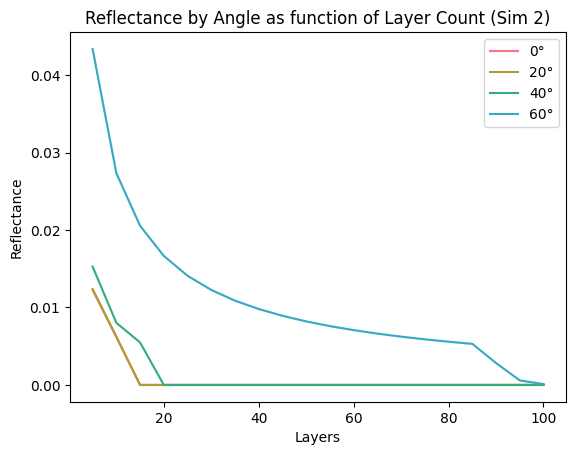

In [489]:
for angle in sim2_df['angle'].unique():
    sns.lineplot(data=sim2_df.loc[sim2_df['angle']==angle], x='layer', y='reflectance', label=f"{angle}°")

plt.legend()
plt.ylabel("Reflectance")
plt.xlabel("Layers")
plt.title("Reflectance by Angle as function of Layer Count (Sim 2)")
plt.savefig("tranfdsafdksanfdsa")
plt.show()

In [453]:
sim2_df.describe()

,angle,layer,transmittance,absorbance,reflectance
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,30.000000,52.500000,0.994103,0.002323,0.003574
std,22.388683,28.867513,0.007060,0.001178,0.007100
min,0.000000,5.000000,0.954668,0.001096,0.000000
25%,15.000000,28.750000,0.992400,0.001501,0.000000
50%,30.000000,52.500000,0.997051,0.001948,0.000000
75%,45.000000,76.250000,0.998307,0.002672,0.005965
max,60.000000,100.000000,0.998904,0.006054,0.043401


In [228]:
sim2_df_good_aura = sim2_df.loc[~sim2_df['angle'].isin([-999])]

In [229]:
sim2_df.groupby(by='layer')["transmittance"].mean().reset_index()

,layer,transmittance
0,5,0.977741
1,10,0.986272
2,15,0.989721
3,20,0.991655
4,25,0.992914
5,30,0.993810
6,35,0.994483
7,40,0.995010
8,45,0.995436
9,50,0.995788


<Axes: xlabel='layer', ylabel='transmittance'>

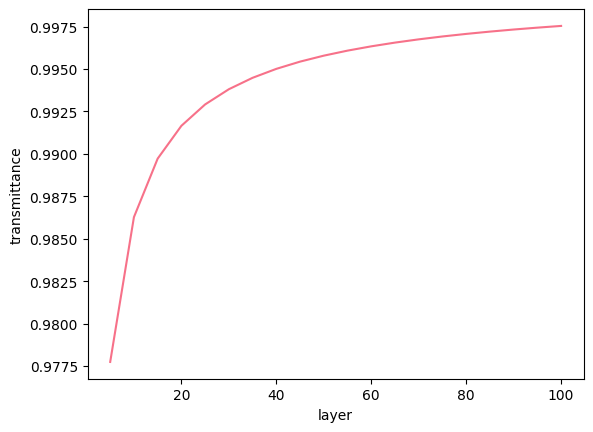

In [480]:
sns.lineplot(sim2_df_good_aura.groupby(by='layer')["transmittance"].mean().reset_index(), x='layer', y='transmittance')
plt.ylabel("Transmittance")
plt.xlabel("Layers")
plt.title("Transmittance by Angle as function of Layer Count (Sim 2)")
plt.savefig("tranfdsafdksanfdsa")
plt.show()

<Axes: xlabel='layer', ylabel='absorbance'>

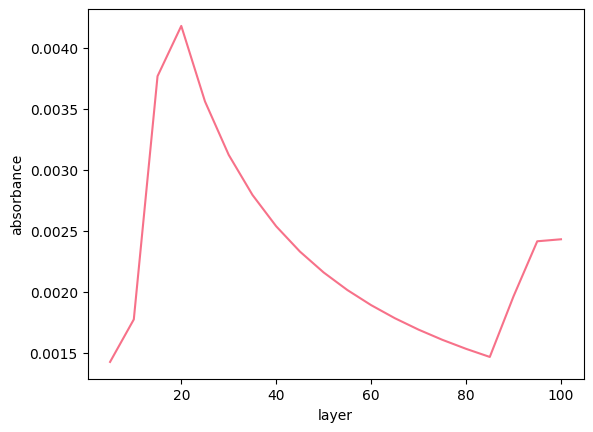

In [481]:
sns.lineplot(sim2_df_good_aura.groupby(by='layer')["absorbance"].mean().reset_index(), x='layer', y='absorbance')

<Axes: xlabel='layer', ylabel='reflectance'>

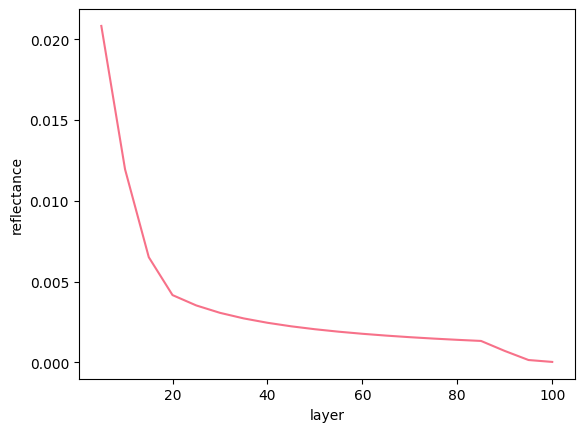

In [482]:
sns.lineplot(sim2_df_good_aura.groupby(by='layer')["reflectance"].mean().reset_index(), x='layer', y='reflectance')

In [212]:
layer_means2 = (
    sim2_df
    .groupby(["angle", "layer"], as_index=False)
    .agg(
        transmittance=("transmittance", "mean"),
        absorbance=("absorbance", "mean"),
        reflectance=("reflectance", "mean"),
    )
)

<Axes: xlabel='reflectance', ylabel='Count'>

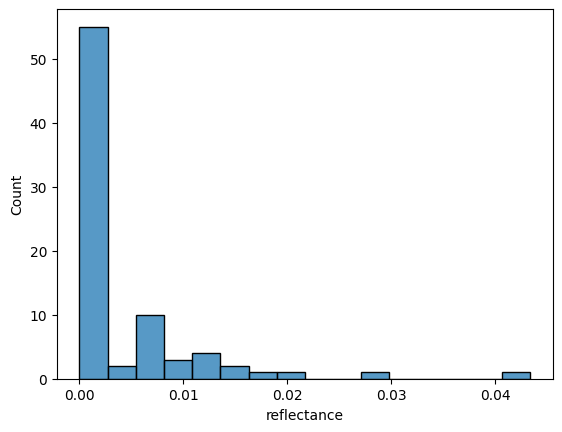

In [194]:
sns.histplot(layer_means2['reflectance'])

In [277]:
sim2_df

,sim,angle,layer,transmittance,absorbance,reflectance
0,Simulation2_AM15GSpectrum,0,10,0.992412,0.001410,0.006178
1,Simulation2_AM15GSpectrum,0,10,0.992408,0.001411,0.006181
2,Simulation2_AM15GSpectrum,0,10,0.992411,0.001410,0.006179
3,Simulation2_AM15GSpectrum,0,10,0.992417,0.001409,0.006174
4,Simulation2_AM15GSpectrum,0,10,0.992413,0.001410,0.006177
...,...,...,...,...,...,...
395,Simulation2_AM15GSpectrum,60,95,0.993599,0.005809,0.000592
396,Simulation2_AM15GSpectrum,60,95,0.993602,0.005827,0.000571
397,Simulation2_AM15GSpectrum,60,95,0.993601,0.005816,0.000582
398,Simulation2_AM15GSpectrum,60,95,0.993599,0.005799,0.000602


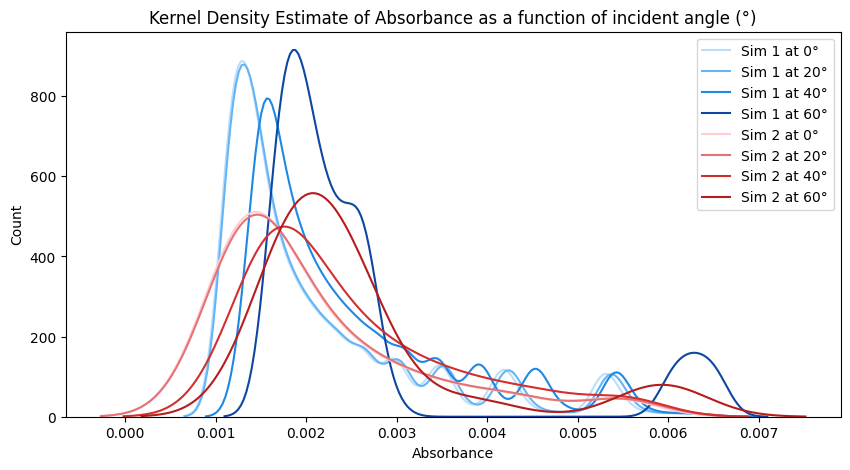

In [286]:
sns.set_palette("tab20")
plt.figure(figsize=(10, 5))
import seaborn as sns

# Simulation 1: Blue Gradient (Lighter to Darker)
sns.kdeplot(sim1_df.loc[sim1_df['angle']==0]['absorbance'],  color='#BBDEFB', label="Sim 1 at 0°")  # Very Light Blue
sns.kdeplot(sim1_df.loc[sim1_df['angle']==20]['absorbance'], color='#64B5F6', label="Sim 1 at 20°") # Light Blue
sns.kdeplot(sim1_df.loc[sim1_df['angle']==40]['absorbance'], color='#1E88E5', label="Sim 1 at 40°") # Medium Blue
sns.kdeplot(sim1_df.loc[sim1_df['angle']==60]['absorbance'], color='#0D47A1', label="Sim 1 at 60°") # Dark Blue

# Simulation 2: Red Gradient (Remains the same)
sns.kdeplot(sim2_df.loc[sim2_df['angle']==0]['absorbance'],  color='#FFCDD2', label="Sim 2 at 0°")  # Very Light Red
sns.kdeplot(sim2_df.loc[sim2_df['angle']==20]['absorbance'], color='#E57373', label="Sim 2 at 20°") # Light Red
sns.kdeplot(sim2_df.loc[sim2_df['angle']==40]['absorbance'], color='#D32F2F', label="Sim 2 at 40°") # Medium Red
sns.kdeplot(sim2_df.loc[sim2_df['angle']==60]['absorbance'], color='#B71C1C', label="Sim 2 at 60°") # Dark Red

# sns.kdeplot(sim1_df['absorbance'])
# sns.kdeplot(sim1_df['reflectance'])
plt.legend()
plt.title("Kernel Density Estimate of Absorbance as a function of incident angle (°)")
plt.xlabel("Absorbance")
plt.ylabel("Count")
plt.savefig("kde_absorb_12")
plt.show()

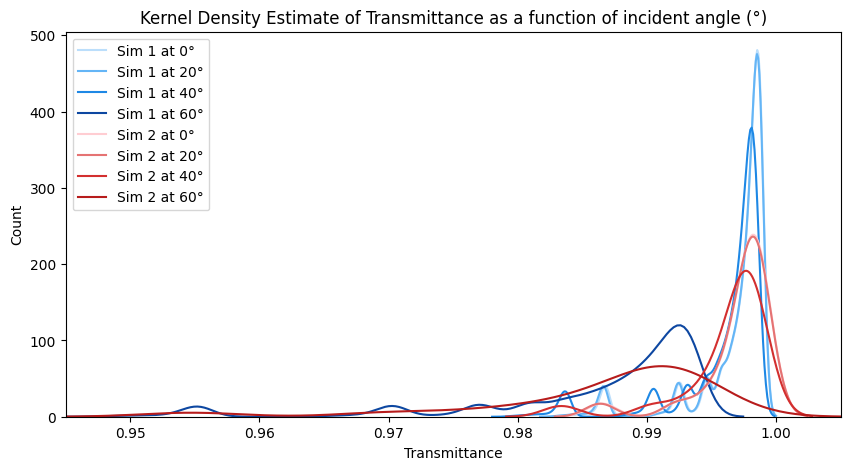

In [291]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("tab20")
plt.figure(figsize=(10, 5))

# Simulation 1: Blue Gradient (Lighter to Darker)
sns.kdeplot(sim1_df.loc[sim1_df['angle']==0]['transmittance'],  color='#BBDEFB', label="Sim 1 at 0°")  # Very Light Blue
sns.kdeplot(sim1_df.loc[sim1_df['angle']==20]['transmittance'], color='#64B5F6', label="Sim 1 at 20°") # Light Blue
sns.kdeplot(sim1_df.loc[sim1_df['angle']==40]['transmittance'], color='#1E88E5', label="Sim 1 at 40°") # Medium Blue
sns.kdeplot(sim1_df.loc[sim1_df['angle']==60]['transmittance'], color='#0D47A1', label="Sim 1 at 60°") # Dark Blue

# Simulation 2: Red Gradient (Lighter to Darker)
sns.kdeplot(sim2_df.loc[sim2_df['angle']==0]['transmittance'],  color='#FFCDD2', label="Sim 2 at 0°")  # Very Light Red
sns.kdeplot(sim2_df.loc[sim2_df['angle']==20]['transmittance'], color='#E57373', label="Sim 2 at 20°") # Light Red
sns.kdeplot(sim2_df.loc[sim2_df['angle']==40]['transmittance'], color='#D32F2F', label="Sim 2 at 40°") # Medium Red
sns.kdeplot(sim2_df.loc[sim2_df['angle']==60]['transmittance'], color='#B71C1C', label="Sim 2 at 60°") # Dark Red

plt.legend()
plt.title("Kernel Density Estimate of Transmittance as a function of incident angle (°)")
plt.xlabel("Transmittance")
plt.ylabel("Count")
plt.xlim(0.945, 1.005)
plt.savefig("kde_transmit.png")
plt.show()

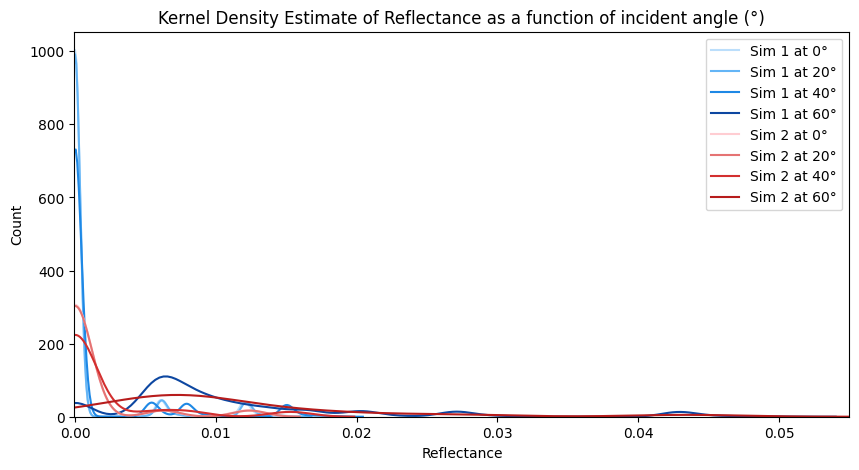

In [376]:
sns.set_palette("tab20")
plt.figure(figsize=(10, 5))

# Simulation 1: Lime Green Gradient (Lighter to Darker)
sns.kdeplot(sim1_df.loc[sim1_df['angle']==0]['reflectance'],  color='#BBDEFB', label="Sim 1 at 0°")  # Very Light Lime-Green
sns.kdeplot(sim1_df.loc[sim1_df['angle']==20]['reflectance'], color='#64B5F6', label="Sim 1 at 20°") # Light Lime-Green
sns.kdeplot(sim1_df.loc[sim1_df['angle']==40]['reflectance'], color='#1E88E5', label="Sim 1 at 40°") # Medium Lime-Green
sns.kdeplot(sim1_df.loc[sim1_df['angle']==60]['reflectance'], color='#0D47A1', label="Sim 1 at 60°") # Dark Lime-Green

# Simulation 2: Purple Gradient (Remains the same)
sns.kdeplot(sim2_df.loc[sim2_df['angle']==0]['reflectance'],  color='#FFCDD2', label="Sim 2 at 0°")  # Very Light Purple
sns.kdeplot(sim2_df.loc[sim2_df['angle']==20]['reflectance'], color='#E57373', label="Sim 2 at 20°") # Light Purple
sns.kdeplot(sim2_df.loc[sim2_df['angle']==40]['reflectance'], color='#D32F2F', label="Sim 2 at 40°") # Medium Purple
sns.kdeplot(sim2_df.loc[sim2_df['angle']==60]['reflectance'], color='#B71C1C', label="Sim 2 at 60°") # Dark Purple
# sns.kdeplot(sim1_df['absorbance'])
# sns.kdeplot(sim1_df['reflectance'])
plt.legend()
plt.title("Kernel Density Estimate of Reflectance as a function of incident angle (°)")
plt.xlabel("Reflectance")
plt.xlim(-0.00005, 0.055)
plt.ylabel("Count")
plt.savefig("kde_reflect12")
plt.show()

# sim 3

In [338]:
sim3_df['transmittance'] = sim3_df['transmittance']*100
sim3_df['absorbance'] = sim3_df['absorbance']*100
sim3_df['reflectance'] = sim3_df['reflectance']*100

In [399]:
sim4_df

,sim,angle,layer,peturbance,transmittance,absorbance,reflectance
0,Simulation4_WavyNormalPerturbance,0,10,0,99.336453,0.110456,0.553090
1,Simulation4_WavyNormalPerturbance,0,10,0,99.336677,0.110401,0.552924
2,Simulation4_WavyNormalPerturbance,0,10,0,99.336890,0.110355,0.552756
3,Simulation4_WavyNormalPerturbance,0,10,0,99.336960,0.110363,0.552678
4,Simulation4_WavyNormalPerturbance,0,10,0,99.336143,0.110732,0.553127
...,...,...,...,...,...,...,...
1995,Simulation4_WavyNormalPerturbance,60,95,8,68.633601,0.275788,31.090610
1996,Simulation4_WavyNormalPerturbance,60,95,8,68.660247,0.272482,31.067271
1997,Simulation4_WavyNormalPerturbance,60,95,8,68.629591,0.271031,31.099378
1998,Simulation4_WavyNormalPerturbance,60,95,8,68.595542,0.275441,31.129018


In [383]:
sim4_df['transmittance'] = sim4_df['transmittance']/100
sim4_df['absorbance'] = sim4_df['absorbance']/100
sim4_df['reflectance'] = sim4_df['reflectance']/100

In [440]:
summary_df = sim3_df.groupby(['peturbance', 'angle'])[['transmittance', 'absorbance', 'reflectance']].mean().reset_index()

In [420]:
summary_df4 = sim4_df.groupby(['peturbance','angle'])[['transmittance', 'absorbance', 'reflectance']].mean().reset_index()

In [443]:
summary_df

,peturbance,angle,transmittance,absorbance,reflectance
0,0,0,99.697235,0.210548,0.092217
1,0,20,99.693650,0.213107,0.093243
2,0,40,99.608923,0.247115,0.143963
3,0,60,98.641434,0.258461,1.100105
4,2,0,99.697214,0.210556,0.092230
5,2,20,99.693354,0.213322,0.093324
6,2,40,99.605877,0.250304,0.143820
7,2,60,98.602868,0.272072,1.125059
8,4,0,99.697227,0.210549,0.092224
9,4,20,99.692444,0.213973,0.093583


In [398]:
summary_df.sort_values(by='transmittance', ascending=False)

,peturbance,angle,layer,transmittance,absorbance,reflectance
259,6,0,100,99.890292,0.109608,0.000000
179,4,0,100,99.890292,0.109602,0.000000
19,0,0,100,99.890281,0.109640,0.000000
99,2,0,100,99.890276,0.109657,0.000000
339,8,0,100,99.890183,0.109770,0.000000
...,...,...,...,...,...,...
60,0,60,5,95.467790,0.192960,4.337212
140,2,60,5,95.373160,0.195460,4.410174
220,4,60,5,95.107625,0.203566,4.665034
300,6,60,5,94.594244,0.215840,5.094728


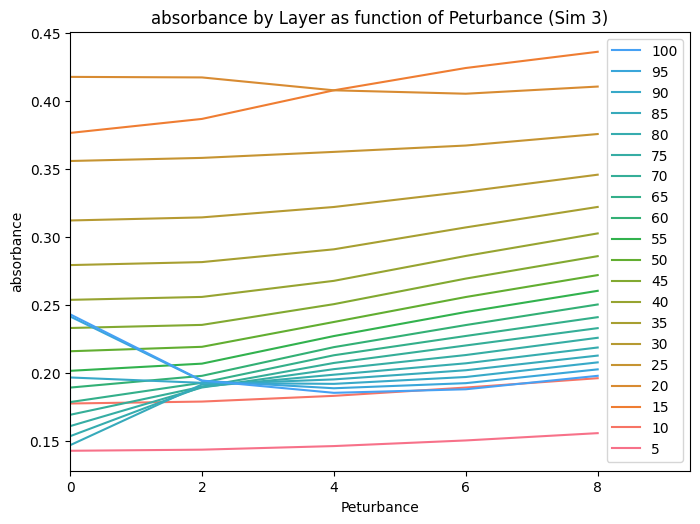

In [388]:
plt.figure(figsize=(8, 5.7))
sns.set_palette('husl', 28)
for layer in summary_df['layer'].unique():
    sns.lineplot(data=summary_df.loc[summary_df['layer']==layer], y="absorbance", x="peturbance", label=layer)
plt.title("absorbance by Layer as function of Peturbance (Sim 3)")
plt.xlabel("Peturbance")
plt.ylabel("Absorbance")
plt.xlim(0, 9.4)
plt.legend(loc="upper right", reverse=True)
plt.savefig("transab3")
plt.show()

In [444]:
summary_df4

,peturbance,angle,transmittance,absorbance,reflectance
0,0,0,99.734115,0.182736,0.083150
1,0,20,99.659135,0.226765,0.114100
2,0,40,91.785438,0.231587,7.982976
3,0,60,68.598400,0.178451,31.223149
4,2,0,99.732136,0.183514,0.084350
5,2,20,99.658745,0.226912,0.114343
6,2,40,91.782239,0.234450,7.983311
7,2,60,68.573855,0.189805,31.236339
8,4,0,99.729560,0.184505,0.085935
9,4,20,99.657550,0.227647,0.114803


In [445]:
summary_df4

,peturbance,angle,transmittance,absorbance,reflectance
0,0,0,99.734115,0.182736,0.083150
1,0,20,99.659135,0.226765,0.114100
2,0,40,91.785438,0.231587,7.982976
3,0,60,68.598400,0.178451,31.223149
4,2,0,99.732136,0.183514,0.084350
5,2,20,99.658745,0.226912,0.114343
6,2,40,91.782239,0.234450,7.983311
7,2,60,68.573855,0.189805,31.236339
8,4,0,99.729560,0.184505,0.085935
9,4,20,99.657550,0.227647,0.114803


In [433]:
summary_df4.loc[summary_df4['angle']==angle]

,peturbance,angle,transmittance,absorbance,reflectance
3,0,60,68.598400,0.178451,31.223149
7,2,60,68.573855,0.189805,31.236339
11,4,60,68.485337,0.210286,31.304377
15,6,60,68.306032,0.234389,31.459578
19,8,60,67.967599,0.262411,31.769990


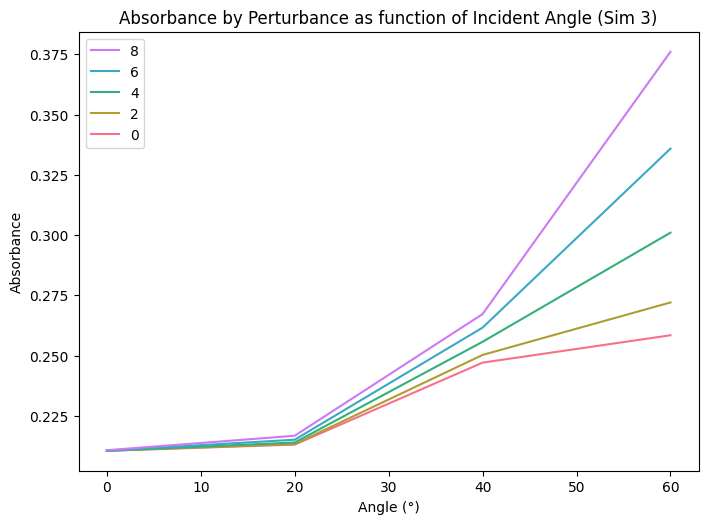

In [449]:
plt.figure(figsize=(8, 5.7))
sns.set_palette('husl', 5)
for peturbance in summary_df['peturbance'].unique():
    sns.lineplot(data=summary_df.loc[summary_df['peturbance']==peturbance], y="absorbance", x="angle", label=peturbance)
plt.title("Absorbance by Perturbance as function of Incident Angle (Sim 3)")
plt.ylabel("Absorbance")
plt.xlabel("Angle (°)")
plt.legend(loc="upper left", reverse=True)
plt.savefig("abspeturb3")
plt.show()

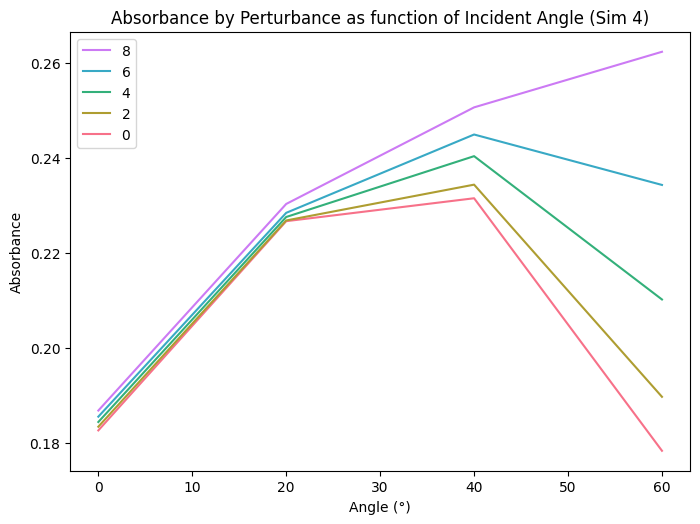

In [448]:
plt.figure(figsize=(8, 5.7))
sns.set_palette('husl', 5)
for peturbance in summary_df4['peturbance'].unique():
    sns.lineplot(data=summary_df4.loc[summary_df4['peturbance']==peturbance], y="absorbance", x="angle", label=peturbance)
plt.title("Absorbance by Perturbance as function of Incident Angle (Sim 4)")
plt.ylabel("Absorbance")
plt.xlabel("Angle (°)")
plt.legend(loc="upper left", reverse=True)
plt.savefig("abspeturb4")
plt.show()

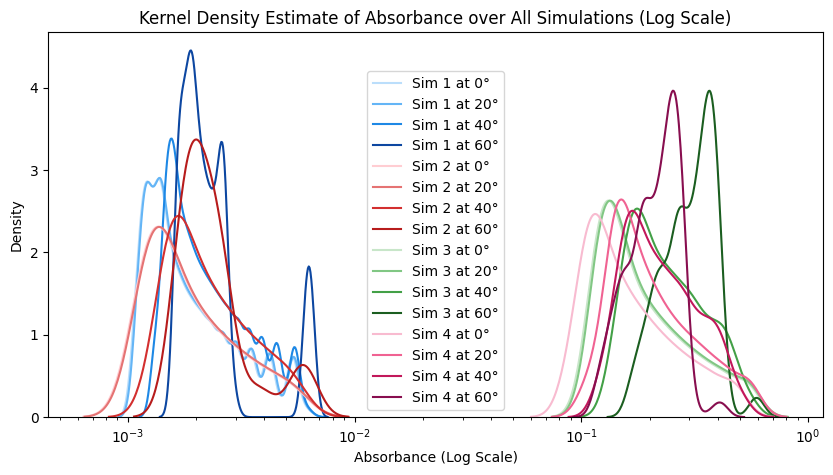

In [422]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("tab20")
plt.figure(figsize=(10, 5))

# Common settings for all plots to ensure correct log-space normalization
kde_kws = {'log_scale': True} 

# Simulation 1: Blue Gradient
sns.kdeplot(sim1_df.loc[sim1_df['angle']==0]['absorbance'],  color='#BBDEFB', label="Sim 1 at 0°", **kde_kws)
sns.kdeplot(sim1_df.loc[sim1_df['angle']==20]['absorbance'], color='#64B5F6', label="Sim 1 at 20°", **kde_kws)
sns.kdeplot(sim1_df.loc[sim1_df['angle']==40]['absorbance'], color='#1E88E5', label="Sim 1 at 40°", **kde_kws)
sns.kdeplot(sim1_df.loc[sim1_df['angle']==60]['absorbance'], color='#0D47A1', label="Sim 1 at 60°", **kde_kws)

# Simulation 2: Red Gradient
sns.kdeplot(sim2_df.loc[sim2_df['angle']==0]['absorbance'],  color='#FFCDD2', label="Sim 2 at 0°", **kde_kws)
sns.kdeplot(sim2_df.loc[sim2_df['angle']==20]['absorbance'], color='#E57373', label="Sim 2 at 20°", **kde_kws)
sns.kdeplot(sim2_df.loc[sim2_df['angle']==40]['absorbance'], color='#D32F2F', label="Sim 2 at 40°", **kde_kws)
sns.kdeplot(sim2_df.loc[sim2_df['angle']==60]['absorbance'], color='#B71C1C', label="Sim 2 at 60°", **kde_kws)

# Simulation 3: Light Green Ombre
sns.kdeplot(sim3_df.loc[sim3_df['angle']==0]['absorbance'],  color='#C8E6C9', label="Sim 3 at 0°", **kde_kws)
sns.kdeplot(sim3_df.loc[sim3_df['angle']==20]['absorbance'], color='#81C784', label="Sim 3 at 20°", **kde_kws)
sns.kdeplot(sim3_df.loc[sim3_df['angle']==40]['absorbance'], color='#43A047', label="Sim 3 at 40°", **kde_kws)
sns.kdeplot(sim3_df.loc[sim3_df['angle']==60]['absorbance'], color='#1B5E20', label="Sim 3 at 60°", **kde_kws)

# Simulation 4: Pink Gradient (Lighter to Darker)
sns.kdeplot(sim4_df.loc[sim4_df['angle']==0]['absorbance'],  color='#F8BBD0', label="Sim 4 at 0°", **kde_kws)  # Very Light Pink
sns.kdeplot(sim4_df.loc[sim4_df['angle']==20]['absorbance'], color='#F06292', label="Sim 4 at 20°", **kde_kws)  # Light Pink
sns.kdeplot(sim4_df.loc[sim4_df['angle']==40]['absorbance'], color='#C2185B', label="Sim 4 at 40°", **kde_kws)  # Medium Pink
sns.kdeplot(sim4_df.loc[sim4_df['angle']==60]['absorbance'], color='#880E4F', label="Sim 4 at 60°", **kde_kws)  # Dark Pink

plt.legend()
plt.title("Kernel Density Estimate of Absorbance over All Simulations (Lofg Scale)")
plt.xlabel("Absorbance (Log Scale)")
plt.ylabel("Density") # KDE produces Density, not Count
plt.savefig("kde_absorb_1234_normalized.png")
# plt.xscale('log') # Removed: handled by kde_kws
plt.show()

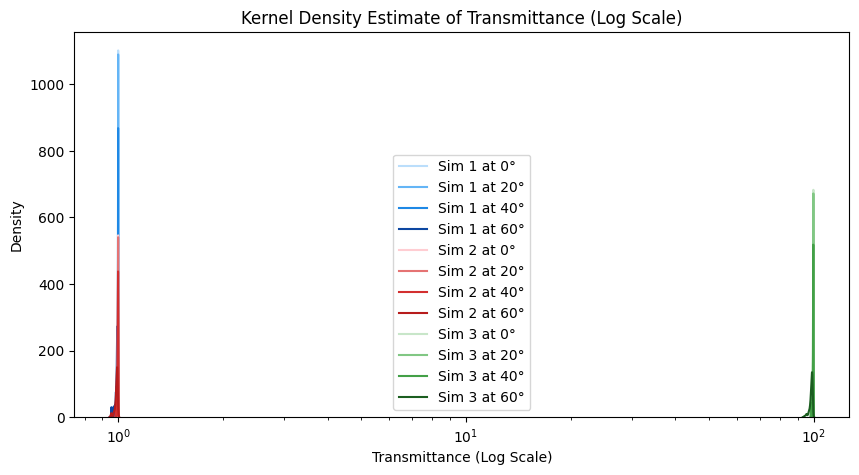

In [347]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("tab20")
plt.figure(figsize=(10, 5))

# Common settings for all plots to ensure correct log-space normalization
kde_kws = {'log_scale': True} 

# Simulation 1: Blue Gradient
sns.kdeplot(sim1_df.loc[sim1_df['angle']==0]['transmittance'],  color='#BBDEFB', label="Sim 1 at 0°", **kde_kws)
sns.kdeplot(sim1_df.loc[sim1_df['angle']==20]['transmittance'], color='#64B5F6', label="Sim 1 at 20°", **kde_kws)
sns.kdeplot(sim1_df.loc[sim1_df['angle']==40]['transmittance'], color='#1E88E5', label="Sim 1 at 40°", **kde_kws)
sns.kdeplot(sim1_df.loc[sim1_df['angle']==60]['transmittance'], color='#0D47A1', label="Sim 1 at 60°", **kde_kws)

# Simulation 2: Red Gradient
sns.kdeplot(sim2_df.loc[sim2_df['angle']==0]['transmittance'],  color='#FFCDD2', label="Sim 2 at 0°", **kde_kws)
sns.kdeplot(sim2_df.loc[sim2_df['angle']==20]['transmittance'], color='#E57373', label="Sim 2 at 20°", **kde_kws)
sns.kdeplot(sim2_df.loc[sim2_df['angle']==40]['transmittance'], color='#D32F2F', label="Sim 2 at 40°", **kde_kws)
sns.kdeplot(sim2_df.loc[sim2_df['angle']==60]['transmittance'], color='#B71C1C', label="Sim 2 at 60°", **kde_kws)

# Simulation 3: Light Green Ombre
sns.kdeplot(sim3_df.loc[sim3_df['angle']==0]['transmittance'],  color='#C8E6C9', label="Sim 3 at 0°", **kde_kws)
sns.kdeplot(sim3_df.loc[sim3_df['angle']==20]['transmittance'], color='#81C784', label="Sim 3 at 20°", **kde_kws)
sns.kdeplot(sim3_df.loc[sim3_df['angle']==40]['transmittance'], color='#43A047', label="Sim 3 at 40°", **kde_kws)
sns.kdeplot(sim3_df.loc[sim3_df['angle']==60]['transmittance'], color='#1B5E20', label="Sim 3 at 60°", **kde_kws)

plt.legend()
plt.title("Kernel Density Estimate of Absorbance (Log Scale)")
plt.xlabel("Absorbance (Log Scale)")
plt.ylabel("Density") # KDE produces Density, not Count
plt.savefig("kde_absorb_12_normalized.png")
# plt.xscale('log') # Removed: handled by kde_kws
plt.show()

<Axes: xlabel='reflectance', ylabel='Count'>

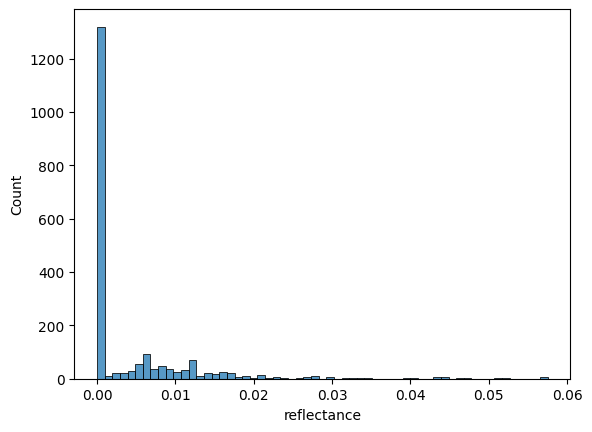

In [297]:
sns.histplot(sim3_df['reflectance'])

In [294]:
sim4_df

,sim,angle,layer,peturbance,transmittance,absorbance,reflectance
0,Simulation4_WavyNormalPerturbance,0,10,0,0.993365,0.001105,0.005531
1,Simulation4_WavyNormalPerturbance,0,10,0,0.993367,0.001104,0.005529
2,Simulation4_WavyNormalPerturbance,0,10,0,0.993369,0.001104,0.005528
3,Simulation4_WavyNormalPerturbance,0,10,0,0.993370,0.001104,0.005527
4,Simulation4_WavyNormalPerturbance,0,10,0,0.993361,0.001107,0.005531
...,...,...,...,...,...,...,...
1995,Simulation4_WavyNormalPerturbance,60,95,8,0.686336,0.002758,0.310906
1996,Simulation4_WavyNormalPerturbance,60,95,8,0.686602,0.002725,0.310673
1997,Simulation4_WavyNormalPerturbance,60,95,8,0.686296,0.002710,0.310994
1998,Simulation4_WavyNormalPerturbance,60,95,8,0.685955,0.002754,0.311290
